In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
from PIL import Image
import os, os.path

imgs = []
cnt = 0
DATASET_PATH = '20210901_Herrenpuent_Taenikon_Matrice_300_15m_1.6m_s/20210901_Herrenpuent_Taenikon_Matrice_300_15m_1.6m_s/'
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(DATASET_PATH):
    cnt = cnt + 1
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(DATASET_PATH,f)))

In [3]:
torch_imgs = []
imgs = imgs[0:20]
for img in imgs:
    trans = transforms.ToTensor()
    torch_img = trans(img)
    torch_imgs.append(torch_img)


In [10]:
def cut_up(image, pieces):
    shape = list(image.shape)
    img_slices = []
    n_star = int(np.round(shape[1]/pieces, decimals=0))
    m_star = int(np.round(shape[2]/pieces, decimals=0))

    height = 0 # describes height while "sliding" over image
    width = 0 # describes width while "sliding" over image
    piece_shape = [3, n_star, m_star]
    
    while height < shape[1] and width < shape[2]:
        print("height: ", height, "width: ", width)
        img_slice = torch.ones(piece_shape, dtype=torch.float64)
        try:
            for i in range(0,shape[0]): # looping over alle channels of tensor
                img_slice[i][0:n_star, 0:m_star] = image[i][height:height + n_star,width:width + m_star]
                height = height + n_star
                width = width + m_star
        except:
            print("Needed size: ", [n_star, m_star], "Rest of image: ", image[i][height:height + n_star,width:width + m_star].shape)
            height = height + n_star
            width = width + m_star
            
        img_slices.append(img_slice)
    return img_slices

In [22]:
print(torch_imgs[0].shape)

torch.Size([3, 5460, 8192])


In [11]:
img_slices = cut_up(torch_imgs[0],20)

height:  0 width:  0
height:  819 width:  1230
height:  1638 width:  2460
height:  2457 width:  3690
height:  3276 width:  4920
height:  4095 width:  6150
height:  4914 width:  7380
Needed size:  [273, 410] Rest of image:  torch.Size([273, 402])


In [12]:
print(len(img_slices))
for img in img_slices:
    print(img.shape)

7
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])


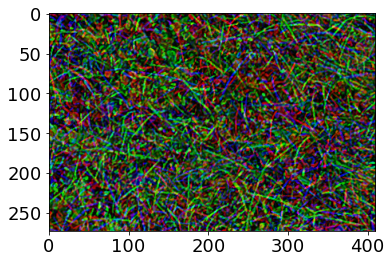

In [15]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 18

#plt.imshow(img_slices[0].permute(1, 2, 0))
plt.imshow(img_slices[1].permute(1, 2, 0))


plt.show()